# Transformations

- `cv.warpAffine`
- `cv.warpPerspective`
이 두 가지를 OpenCV에서 제공하고, 모든 종류의 변환을 가할 수 있다.

`cv.warpAffine`은 $2\times 3$ 변환 행렬을 입력받는 반면 `cv.warpPerspective`는 $3\times 3$ 변환 행렬을 입력받는다.

## Scaling

스케일링은 그냥 이미지 크기 변경이다. OpenCV는 이를 위해 `cv.resize()`를 제공한다. 변환 후의 이미지 크기는 명확히 지정되거나 스케일링 요인을 따로 지정할 수도 있다. 보간 방법도 여러가지다. 일반적으로 선호되는 보간법들은 축소(shrinking)를 위한 `cv.INTER_AREA`와 확대(zooming)를 위한 `cv.INTER_CUBIC`&`cv.INTER_LINEAR`들이다. 모든 크기 변경 작업에서 기본 보간법은 `cv.INTER_LINEAR`로 설정되어 있다.

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./sample_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

res.size/img.size

4.0

## Translation

번역은 객체 위치의 이동이다. 만약 $(x,y)$ 방향의 이동을 알고 그것이 $(t_x, t_y)$라고 하자. 그러면 아래와 같은 변환 행렬 $\mathbf{M}$을 만들 수 있다.

$$
\mathbf{M} = \begin{bmatrix}
1&0&t_x \\ 0&1&t_y
\end{bmatrix}
$$

`np.float32` 자료형의 넘파이 배열을 만들고 `cv.warpAffine` 함수에 전달하면 변환된 것을 얻을 수 있다. 아래는 $(100,50)$ 만큼 이동하는 예제이다.

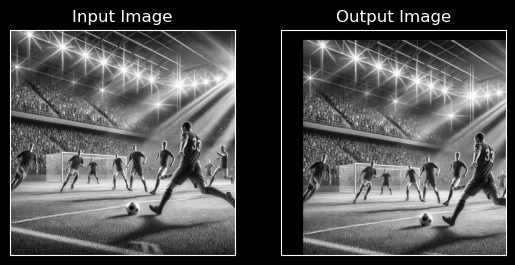

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv.imread('./sample_image.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Rotation

각도 $\theta$ 만큼의 이미지 회전은 아래와 같은 형태의 변환 행렬로 이뤄진다.

$$
\mathbf{M} = \begin{bmatrix}
\cos{\theta}& - \sin{\theta} \\ \sin{\theta}& \cos{\theta}
\end{bmatrix}
$$

그러나 OpenCV는 아래와 같이 수정된 변환 행렬을 사용하여 회전의 중심을 조정 가능한 스케일링된 회전을 제공함으로써 원하는 어떤 위치에서도 회전 가능하게 한다.

$$
\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ - \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y \end{bmatrix}
$$

여기서:

$$
\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}
$$

`cv.getRotationMatrix2D`라는 OpenCV 제공 함수가 이 변환행렬의 역할을 한다.

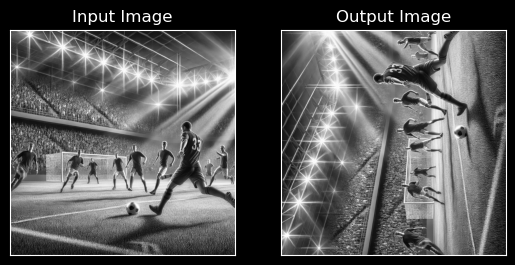

In [2]:
img = cv.imread('./sample_image.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows, cols = img.shape

M = cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()